<a href="https://colab.research.google.com/github/TheAcoff/Notebook-Alura/blob/main/Python%20para%20Data%20Science/Numpy/An%C3%A1lise%20de%20Dados%20Laranja_Toranja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook criado para exercício do curso de Numpy da Alura para Data Science

# Primeira Análise
Temos uma tabela com dados de dois tipos de frutas diferentes, com as informações físicas sobre cada uma delas.

No primeiro momento, importamos os dados com algumas condições determinadas por uma análise prévia. Nesta análise, vemos que a primeira coluna possui o nome da fruta, e as demais informações sobre peso, diâmetro e informações Red Green Blue (RGB) da fruta. Temos 5000 dados de Laranja e 5000 dados de Toranja

Para evitar problemas na leitura do numpy, tiramos a primeira coluna, definindo o parâmetro `usecols=np.arange(1,6,1)`. Também, observa-se um índice na primeira linha que será retirado pelo parâmetro `skiprows = 1`. Os demais parâmetros de leitura definem o separador e o url para importar a tabela

In [1]:
import numpy as np

url = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'

citrus = np.loadtxt(url,delimiter = ',',skiprows = 1,usecols=np.arange(1,6,1))


Rodamos uma análise do formato do array:

In [2]:
citrus.shape

(10000, 5)

Visualisamos 5 dados de laranja e toranja, respectivamente, utilizando o formato:
```python
array[linha,coluna]
```



In [3]:
citrus[1:5,:] #Laranja

array([[  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       [  4.47,  95.6 , 163.  ,  81.  ,   4.  ],
       [  4.48,  95.76, 161.  ,  72.  ,   9.  ]])

e 5 dados de toranja

In [4]:
citrus[5001:5005,:] #Toranja

array([[  7.69, 133.98, 150.  ,  43.  ,  15.  ],
       [  7.72, 135.56, 150.  ,  54.  ,  21.  ],
       [  7.77, 135.62, 150.  ,  75.  ,  15.  ],
       [  7.84, 136.63, 149.  ,  77.  ,  20.  ]])

---

## Gráfico Peso vs Diâmetro
Será feita uma análise preliminar da relação entre preso e dimensão das frutas, visando futuras análises.

Primeiramente, separamos os dados de peso e diâmetro da Laranja e Toranja, respectivamente.

In [5]:
#Laranja
diamL = citrus[:5000,0]
pesoL = citrus[:5000,1]


#Toranja
diamT = citrus[5000:,0]
pesoT = citrus[5000:,1]

Com os dados separados, podemos fazer o gráfico para visualização dos dados

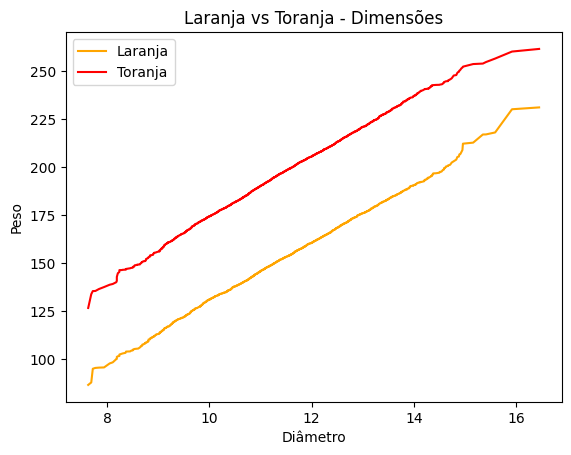

In [6]:
import matplotlib.pyplot as plt

plt.title('Laranja vs Toranja - Dimensões') #Título do Gráfico
plt.plot(diamT,pesoL,color='orange') #Plots Laranja
plt.plot(diamT,pesoT,color='red') #Plots Toranja
plt.legend(['Laranja','Toranja']) #Legenda
plt.xlabel('Diâmetro') #Legenda eixo X
plt.ylabel('Peso') #Legenda eixo Y
plt.show() #Mostrar o gráfico

---

# Regressão Linear
Com o gráfico pronto, observamos uma relação de crescimento linear nos valores. Podemos tentar prever esse modelo e gerar uma aproximação linear para esses dados. Para isso, podemos utilizar os cálculos de regressão linear para esses dados.

## Matemática
Uma reta possui a equação geral dada por
$$
y = ax + b
$$
em que $a$ é o coeficiente angular, que ajusta a inclinação da reta, nos mostrando a taxa de crescimento da nossa reta e $b$ é o coeficiente linear, que é o ponto inicial $x=0$.

Primeiramente, vamos em busca do coeficiente angular, que é dado pela equação
$$
\hat{a} = \frac{n \cdot \sum_{i} X_i \cdot Y_i  - \sum_{i} X_i \cdot \sum_{i}Y_i}{n \cdot \sum_{i}(X_i^2) - (\sum_{i}(X_i))^2},
$$
e do coeficiente linear dado por
$$
\hat{b}\sum_{i}^{n}\left(\frac{1}{n}Y_{i}\right) - \hat{a} \cdot \sum_{i}^{n}\left(\frac{1}{n} X_{i}\right)
$$
em que $\sum_{i}^{n}\left(\frac{1}{n}x_{i}\right)$ é a média aritmética usual, que será calculada por `np.mean(dado)`

Para analisar a eficiência da reta, podemos inicialmente chutar uma reta arbitrária e utilizar o desvio quadrático médio para analisar o erro, com
$$
\sigma = \sqrt{\sum_{i=1}^{n}(Y_{i}-y_i)^2},
$$
em que $Y_{i}$ são os nossos dados e $y_i$ são os pontos da reta. O numpy facilita esses cálculos com a função:
```python
np.linalg.norm()
```

## Frutas
Utilizaremos a notação `VARfruta` para indicar qual a variável ($X$ ou $Y$) e qual o tipo de fruta.

### Laranja





In [7]:
Xl = diamL
Yl = pesoL
n = np.size(Xl)

#Coeficientes
al = (n*np.sum(Xl*Yl) - np.sum(Xl)*np.sum(Yl))/(n*np.sum(Xl**2)-np.sum(Xl)**2)
bl = np.mean(Yl) - al*np.mean(Xl)

#Eficiência
normaL = np.array([])
for i in range(n):
  normaL = np.append(normaL,np.linalg.norm(Yl[i]-(al*Xl[i]+bl)))

print(f'Coeficiente angular: {al},\nCoeficiente linear: {bl}.')
print(f'Desvio médio: {normaL.mean()}')

Coeficiente angular: 14.7997452319846,
Coeficiente linear: 27.38560381218413.
Desvio médio: 0.4011620570610262


Gráfico da Laranja

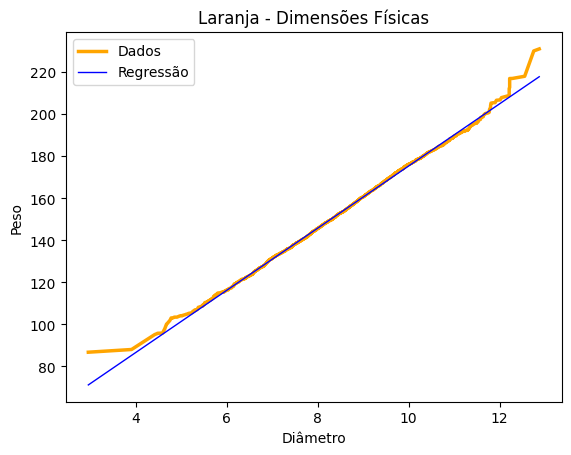

In [8]:
plt.title('Laranja - Dimensões Físicas')
plt.plot(diamL,pesoL,color='orange',linewidth=2.5) #Plot Dimensões
plt.plot(Xl,al*Xl+bl,color='blue',linewidth=1) #Plot da reta
plt.legend(['Dados','Regressão'])
plt.xlabel('Diâmetro')
plt.ylabel('Peso')
plt.show()

### Toranja


In [9]:
Xt = diamT
Yt = pesoT
n = np.size(Xt)

#Coeficientes
at = (n*np.sum(Xt*Yt) - np.sum(Xt)*np.sum(Yt))/(n*np.sum(Xt**2)-np.sum(Xt)**2)
bt = np.mean(Yt) - at*np.mean(Xt)

#Eficiência
normaT = np.array([])
for i in range(n):
  normaT = np.append(normaT,np.linalg.norm(Yl[i]-(at*Xl[i]+bt)))

print(f'Coeficiente angular: {at},\nCoeficiente linear: {bt}.')
print(f'Desvio médio: {normaT.mean()}')

Coeficiente angular: 15.70884459360376,
Coeficiente linear: 17.007102876817726.
Desvio médio: 2.7318327376868283


Gráfico Toranja

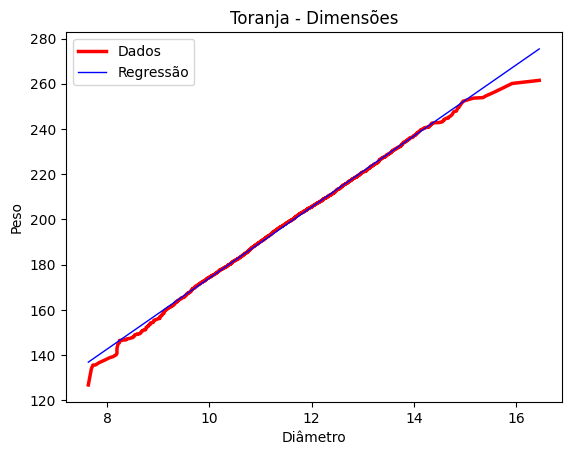

In [10]:
plt.title('Toranja - Dimensões')
plt.plot(diamT,pesoT,color='red',linewidth=2.5) #Plot Dimensões
plt.plot(Xt,at*Xt+bt,color='blue',linewidth=1) #Plot da reta
plt.legend(['Dados','Regressão'])
plt.xlabel('Diâmetro')
plt.ylabel('Peso')
plt.show()

---

# Regressão Aleatória
Dado um valor $b = 17$ e 300 números aleatórios de coeficientes entre 0 e 25, podemos criar uma matriz para tentar estimar qual o coeficiente linear mais eficiente

In [12]:
b = 17
iteracoes = 300

np.random.seed(122)
normaL = np.array([])
normaT = np.array([])
a = np.random.uniform(low=0.0,high=25,size=iteracoes)

for i in range(iteracoes):
  normaL = np.append(normaL,np.linalg.norm(Yl-(a[i]*Xl+b)))
  normaT = np.append(normaT,np.linalg.norm(Yt-(a[i]*Xt+b)))

print(f'Melhor coeficiente encontrado para Laranja: {a[np.argmin(normaL)]},\n com desvio: {np.min(normaL)}\n')
print(f'Menor coeficiente encontrado para Toranja: {a[np.argmin(normaT)]},\ncom desvio {np.min(normaT)}')


Melhor coeficiente encontrado para Laranja: 15.998049856336982,
 com desvio: 117.55861859261618

Menor coeficiente encontrado para Toranja: 15.864280694382188,
com desvio 133.99755063766924
